In [19]:
from tqdm import tqdm
import os
import json
import pandas as pd
from itertools import combinations
from collections import defaultdict

# You provide this
list_of_folders = [
                    r"C:\Users\gac8\PycharmProjects\PSSearch\retail_forecasting_data_collection\local_results",
                    r"C:\Users\gac8\PycharmProjects\PSSearch\retail_forecasting_data_collection\local_results_without_gt",
                   ]  # List of folder paths containing JSON files

# Store: code_name -> list of runs (each run is a list of patterns)
code_name_to_runs = defaultdict(list)

# Load JSON files
for folder in list_of_folders:
    print(f"Processing folder {folder}")
    for filename in os.listdir(folder):
        print(f"Processing file {filename}")
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                content = json.load(f)
                for entry in content['data']:
                    code_name = entry['config']['code_name']
                    patterns = [set(r['pattern']) for r in entry['results']]
                    code_name_to_runs[code_name].append(patterns)

# Compute Jaccard distance between two patterns
def jaccard_distance(set1, set2):
    union = set1 | set2
    if not union:
        return 0.0  # Both empty sets
    return 1 - len(set1 & set2) / len(union)

def edit_distance(set1, set2):
    return len((set1 | set2).difference(set1 & set2)) / max(len(set1), len(set2))

# Distance between two runs
def run_distance(run1, run2):
    if not run1 or not run2:
        return float('inf')  # Avoid dividing by zero
    total = 0
    for pattern1 in run1:
        best = min(jaccard_distance(pattern1, pattern2) for pattern2 in run2)
        total += best
    return total / len(run1)

# Build results
print("Now beginning to analyse the consistency of each codename")
records = []
for code_name, runs in code_name_to_runs.items():
    print("Analysing codename", code_name)
    quantity_runs_to_check = 12 # len(runs)
    for i, j in tqdm(combinations(range(quantity_runs_to_check), 2)):
        d = run_distance(runs[i], runs[j])
        records.append({
            "code_name": code_name,
            "run_i": i,
            "run_j": j,
            "distance": d
        })

df = pd.DataFrame(records)
print(df)


Processing folder C:\Users\gac8\PycharmProjects\PSSearch\retail_forecasting_data_collection\local_results
Processing file result_06-22-H13'm'58's07.json.txt
Processing file result_06-22-H15'm'08's06.json
Processing file result_06-22-H16'm'14's24.json
Processing file result_06-22-H17'm'20's02.json
Processing file result_06-22-H18'm'27's37.json
Processing file result_06-22-H19'm'34's42.json
Processing file result_06-22-H20'm'42's11.json
Processing file result_06-22-H21'm'51's51.json
Processing file result_06-22-H23'm'02's28.json
Processing file result_06-23-H00'm'09's37.json
Processing file result_06-23-H01'm'15's05.json
Processing file result_06-23-H02'm'23's13.json
Processing file result_06-23-H03'm'33's49.json
Processing file result_06-23-H04'm'39's53.json
Processing file result_06-23-H05'm'48's38.json
Processing file result_06-23-H06'm'55's06.json
Processing file result_06-23-H08'm'01's08.json
Processing file result_06-23-H09'm'09's37.json
Processing file result_06-23-H10'm'28's26.js

66it [00:00, 97.10it/s] 


Analysing codename [CS CM CC][SSize MFit CAtom][G3]


66it [00:03, 20.58it/s]


Analysing codename [CS CM CC][Len MFit CAtom][G3]


66it [00:00, 1747.83it/s]


Analysing codename [CS CM CC][Len SSize CAtom][G3]


66it [00:02, 31.60it/s]


Analysing codename [CS CM CC][Len SSize MFit][G3]


66it [00:01, 43.99it/s]


Analysing codename [OS CM CC][Len SSize MFit CAtom][G3]


66it [00:00, 134.87it/s]


Analysing codename [CS OM CC][Len SSize MFit CAtom][G3]


66it [00:00, 231.58it/s]


Analysing codename [CS CM OC][Len SSize MFit CAtom][G3]


66it [00:00, 127.76it/s]


Analysing codename [CS CM CC][Len SSize MFit CAtom][Gauto]


66it [00:00, 115.77it/s]


Analysing codename [CS CM CC][Len SSize MFit CAtom][G4]


66it [00:00, 83.21it/s]


Analysing codename [CS CM CC][Len SSize MFit CAtom][G5]


66it [00:00, 81.63it/s] 


Analysing codename [CS CM CC][Len SSize MFit CAtom][GNone]


66it [00:00, 562.84it/s]


Analysing codename [CS CM CC][SSize MFit CAtom][GNone]


66it [00:00, 881.46it/s]


Analysing codename [CS CM CC][Len MFit CAtom][GNone]


66it [00:00, 33018.14it/s]


Analysing codename [CS CM CC][Len SSize CAtom][GNone]


66it [00:00, 89211.75it/s]


Analysing codename [CS CM CC][Len SSize MFit][GNone]


66it [00:00, 2040.47it/s]


Analysing codename [OS CM CC][Len SSize MFit CAtom][GNone]


66it [00:00, 564.80it/s]


Analysing codename [CS OM CC][Len SSize MFit CAtom][GNone]


66it [00:00, 247.71it/s]


Analysing codename [CS CM OC][Len SSize MFit CAtom][GNone]


66it [00:00, 365.16it/s]

                                    code_name  run_i  run_j  distance
0        [CS CM CC][Len SSize MFit CAtom][G3]      0      1  0.876946
1        [CS CM CC][Len SSize MFit CAtom][G3]      0      2  0.880939
2        [CS CM CC][Len SSize MFit CAtom][G3]      0      3  0.854066
3        [CS CM CC][Len SSize MFit CAtom][G3]      0      4  0.859182
4        [CS CM CC][Len SSize MFit CAtom][G3]      0      5  0.856514
...                                       ...    ...    ...       ...
1249  [CS CM OC][Len SSize MFit CAtom][GNone]      8     10  0.445652
1250  [CS CM OC][Len SSize MFit CAtom][GNone]      8     11  0.420290
1251  [CS CM OC][Len SSize MFit CAtom][GNone]      9     10  0.417037
1252  [CS CM OC][Len SSize MFit CAtom][GNone]      9     11  0.391111
1253  [CS CM OC][Len SSize MFit CAtom][GNone]     10     11  0.396970

[1254 rows x 4 columns]


In [20]:
agg_stats = (
    df
    .groupby("code_name")["distance"]
    .agg(mean_distance="mean", std_distance="std", num_pairs="count")
    .reset_index()
)

# Also add number of runs per code_name
agg_stats["num_runs"] = agg_stats["code_name"].map(lambda cn: len(code_name_to_runs[cn]))

# Final outputs
print("Pairwise Distance DataFrame:")
df.sort_values(by=["distance"], ascending = True, inplace=True)
display(df)
print("\nAggregated Summary per Code Name:")
agg_stats.sort_values(by="mean_distance", ascending=True, inplace=True)
display(agg_stats)

Pairwise Distance DataFrame:


,code_name,run_i,run_j,distance
1002,[CS CM CC][Len SSize MFit][GNone],1,3,0.179487
1029,[CS CM CC][Len SSize MFit][GNone],4,6,0.184524
1023,[CS CM CC][Len SSize MFit][GNone],3,7,0.184524
1030,[CS CM CC][Len SSize MFit][GNone],4,7,0.184524
1024,[CS CM CC][Len SSize MFit][GNone],3,8,0.190476
...,...,...,...,...
511,[CS CM OC][Len SSize MFit CAtom][G3],5,10,0.883694
347,[OS CM CC][Len SSize MFit CAtom][G3],1,8,0.883804
377,[OS CM CC][Len SSize MFit CAtom][G3],5,8,0.884011
396,[CS OM CC][Len SSize MFit CAtom][G3],0,1,0.895000



Aggregated Summary per Code Name:


,code_name,mean_distance,std_distance,num_pairs,num_runs
10,[CS CM CC][Len SSize MFit][GNone],0.250030,0.042081,66,100
7,[CS CM CC][Len SSize MFit CAtom][GNone],0.417780,0.031433,66,100
18,[OS CM CC][Len SSize MFit CAtom][GNone],0.426836,0.034000,66,100
14,[CS CM OC][Len SSize MFit CAtom][GNone],0.429134,0.026532,66,100
12,[CS CM CC][SSize MFit CAtom][GNone],0.467639,0.042920,66,100
11,[CS CM CC][SSize MFit CAtom][G3],0.484801,0.054235,66,100
16,[CS OM CC][Len SSize MFit CAtom][GNone],0.517093,0.054867,66,100
3,[CS CM CC][Len SSize CAtom][GNone],0.672244,0.099200,66,100
1,[CS CM CC][Len MFit CAtom][GNone],0.705759,0.098169,66,100
2,[CS CM CC][Len SSize CAtom][G3],0.741843,0.025635,66,100


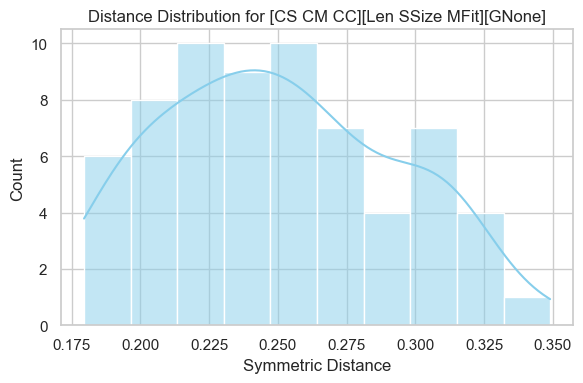

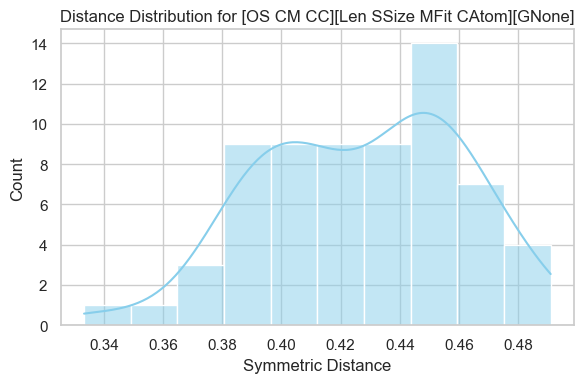

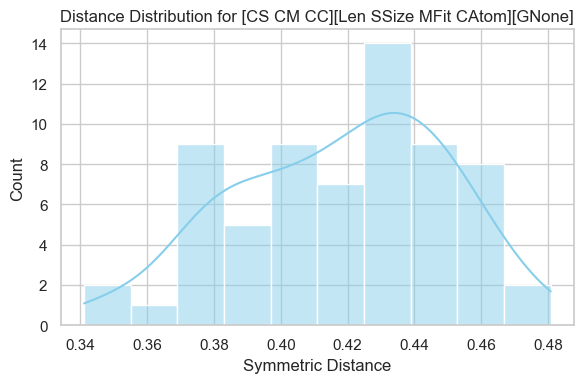

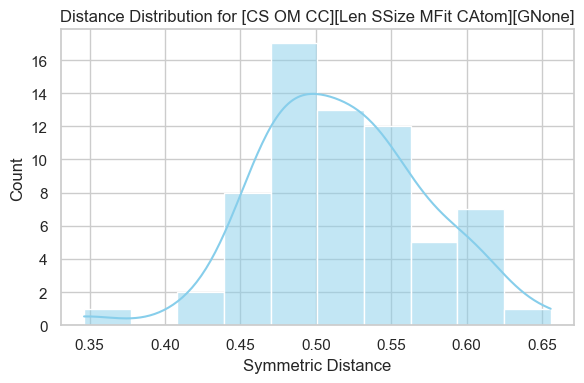

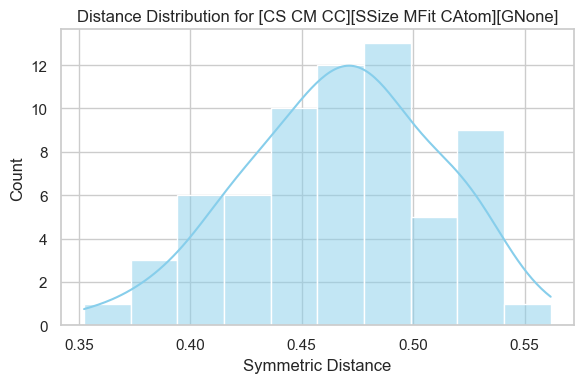

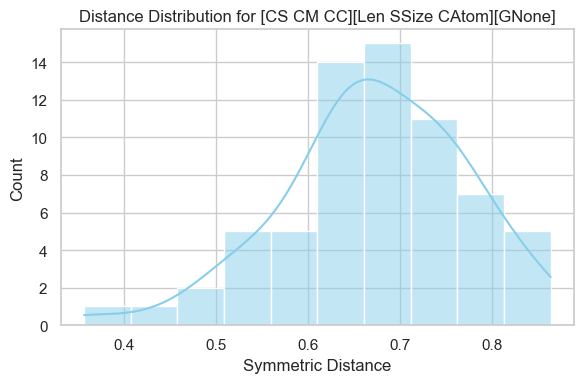

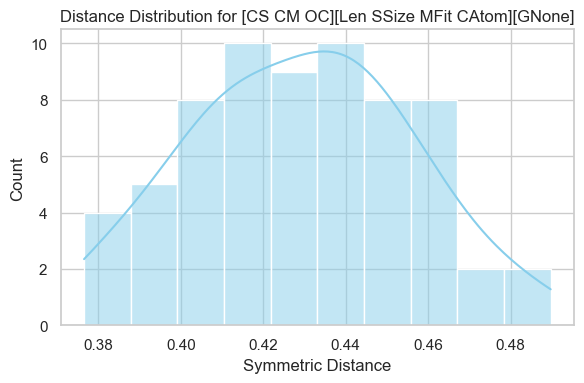

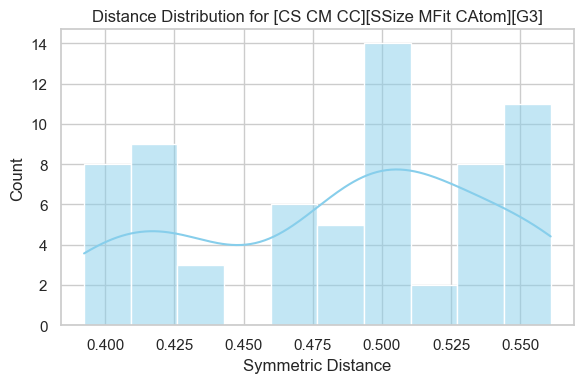

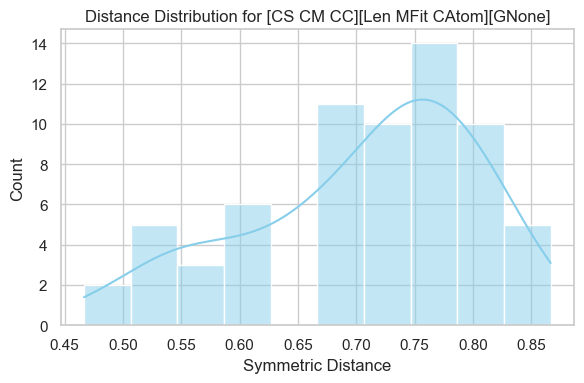

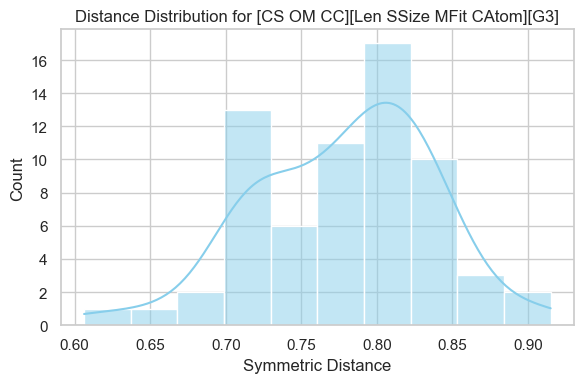

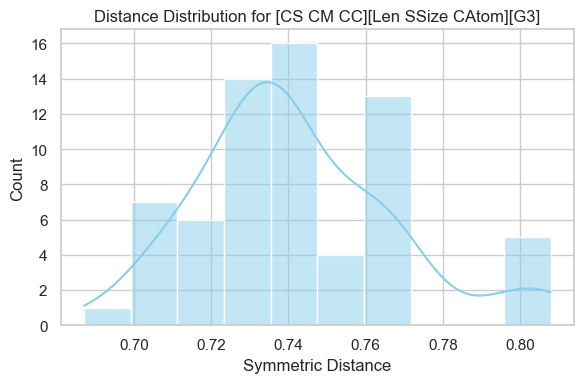

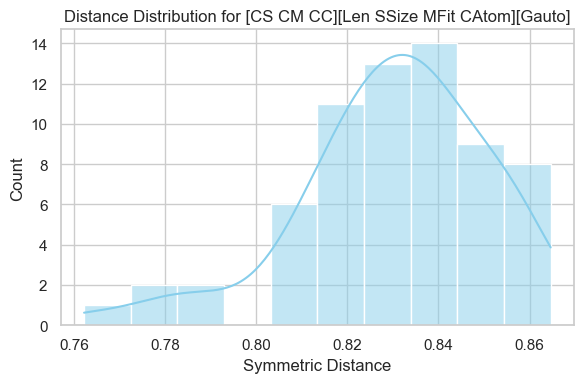

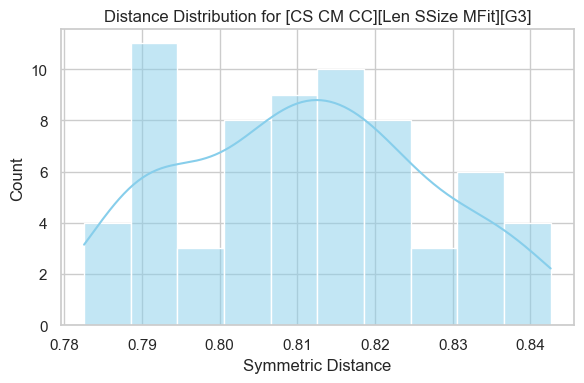

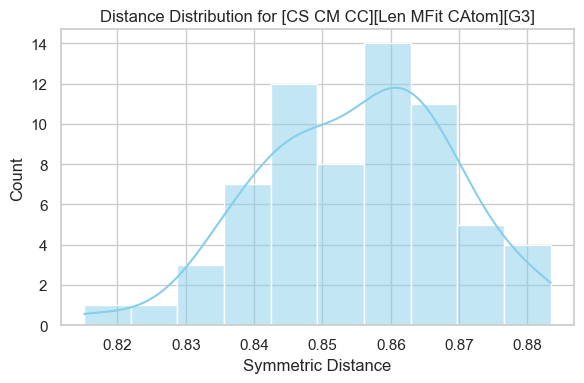

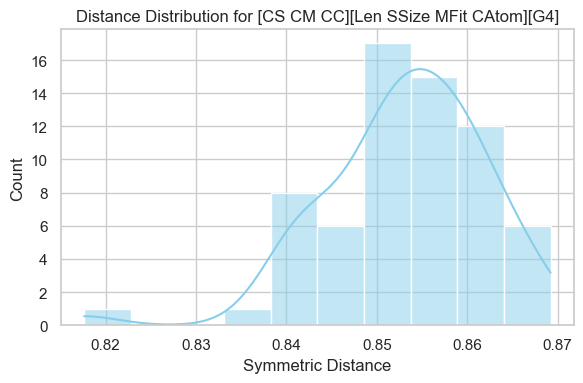

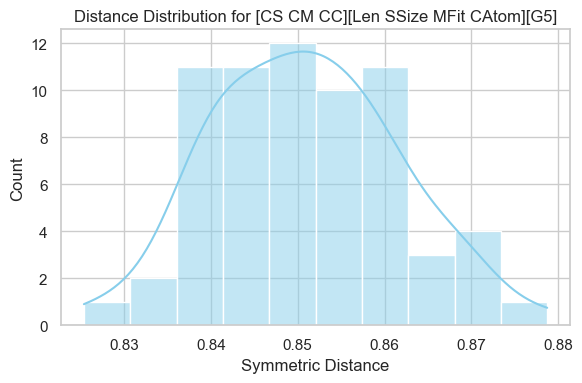

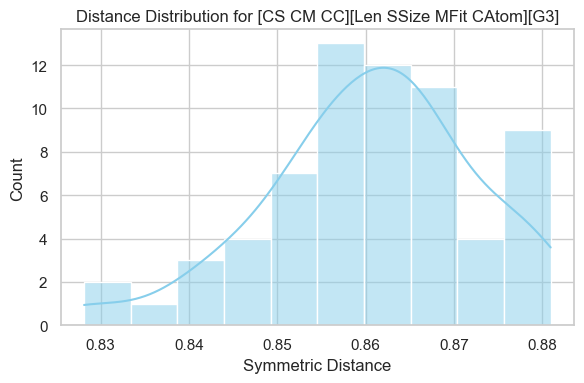

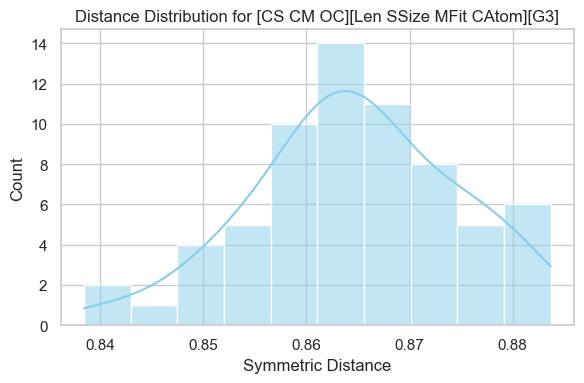

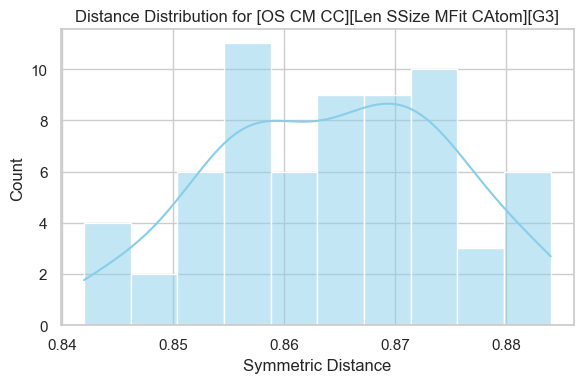

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better style
sns.set(style="whitegrid")

# Make one histogram per code_name
for code_name in df['code_name'].unique():
    subset = df[df['code_name'] == code_name]

    plt.figure(figsize=(6, 4))
    sns.histplot(subset['distance'], bins=10, kde=True, color='skyblue')

    plt.title(f'Distance Distribution for {code_name}')
    plt.xlabel('Symmetric Distance')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Optional: Save to file instead of showing
    # plt.savefig(f'distance_hist_{code_name.replace(" ", "_")}.png')
    # plt.close()
